In [4]:
import sys
if "../.." not in sys.path: sys.path.insert(0, "../..")
if ".." not in sys.path: sys.path.insert(0, "..")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from experiment.v1dd_em_client import V1DDEMClient
from analysis_tools import set_stylesheet
set_stylesheet()
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
em_client = V1DDEMClient()

/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/standard_transform/datasets.py:21: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, _ = R.align_vectors(np.array([[0, 1, 0]]), [up])


In [3]:
print("Coregistered cells:")
em_client.get_2p_corresponded_table().groupby(["axon_proofreading_complete", "dendrite_proofreading_complete"]).size().sort_index(ascending=False)

Coregistered cells:


axon_proofreading_complete  dendrite_proofreading_complete
True                        True                              20
False                       False                             28
dtype: int64

In [135]:
cell_type_table = em_client.get_cell_type_table()
cell_type_table.head(10)

,index,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,position_microns,axon_proofreading_status,axon_proofreading_complete,dendrite_proofreading_status,dendrite_proofreading_complete
0,0,1132,t,350562,coarse_manual,PYC,350562,t,326.965400,94866276031228266,864691132773514104,"[894573, 478559, 163530]","[891003, 473981, 17111]","[898608, 483370, 18134]","[-13.227572489957907, 226.5862979342913, -382....",not_started,False,not_started,False
1,1,214,t,383955,coarse_manual,PYC,383955,t,504.192300,95649060060623076,864691132569667100,"[920802, 795478, 329220]","[914826, 790822, 34920]","[926389, 800366, 36123]","[14.741818935006158, 576.1578669978572, -307.2...",not_started,False,in_progress,False
2,2,13,t,385028,coarse_manual,PYC,385028,t,415.785065,95863052645657911,864691132781402571,"[929338, 898530, 386595]","[924914, 892245, 41162]","[933994, 903885, 42103]","[23.848399659480666, 690.7637364002102, -279.5...",not_started,False,in_progress,False
3,3,717,t,293764,coarse_manual,PYC,293764,t,231.369357,94450111081742956,864691132625300120,"[878665, 697702, 245475]","[874009, 694365, 26030]","[883554, 701349, 26859]","[-27.97517873296875, 459.74380331495826, -361....",submitted,True,submitted,True
4,4,2604,t,351373,coarse_manual,PYC,351373,t,277.321739,96276193669654108,864691132689074198,"[944314, 572378, 210330]","[939814, 568187, 22179]","[948505, 576413, 23110]","[37.02512562261708, 329.260361441734, -362.108...",not_started,False,not_started,False
5,5,3107,t,384793,coarse_manual,Non-neuronal,384793,t,176.705265,96002003427327315,864691132700601419,"[934304, 833734, 374445]","[928794, 830786, 39867]","[940434, 836606, 40890]","[28.48738755819702, 625.0561090808981, -273.94...",not_started,False,not_started,False
6,6,3126,t,384639,coarse_manual,PYC,384639,t,255.960178,96987371937497920,864691132805623033,"[968215, 841029, 365895]","[963171, 837459, 39018]","[972949, 844754, 39828]","[62.42156172336766, 629.6272960895836, -284.13...",not_started,False,not_started,False
7,7,3510,t,397015,coarse_manual,PYC,397015,t,286.041850,98398182660372459,864691132985597280,"[1018267, 966741, 305775]","[1013146, 962473, 32534]","[1023156, 971397, 33344]","[112.99574837787077, 734.4076867037824, -375.7...",not_started,False,not_started,False
8,8,2131,t,266732,coarse_manual,Non-neuronal,266732,t,190.102206,91346052585924801,864691132697512582,"[769870, 413841, 332595]","[766455, 409030, 35449]","[773594, 419506, 36322]","[-138.01414299146796, 210.1077240338913, -201....",not_started,False,not_started,False
9,9,1578,t,278239,coarse_manual,PYC,278239,t,258.657505,92547406344001512,864691132679400495,"[812006, 598296, 286875]","[807894, 594028, 30477]","[816274, 602642, 31331]","[-95.05493981461576, 375.38068857135727, -295....",not_started,False,not_started,False


In [144]:
axon_proof_table = em_client.get_axon_proofreading_table()
axon_proof_table.cell_type.value_counts()

submitted      2420
in_progress     290
complete         13
Name: cell_type, dtype: int64

In [186]:
print("Proofreading by cell type:")
cell_type_table.groupby(["axon_proofreading_complete", "dendrite_proofreading_complete"])["cell_type"].value_counts().sort_index(ascending=False)

Proofreading by cell type:


axon_proofreading_complete  dendrite_proofreading_complete  cell_type   
True                        True                            Unsure I          17
                                                            PYC              184
                                                            NGC                5
                                                            MC                23
                                                            BPC               16
                                                            BC                32
                            False                           Unsure I          83
                                                            PYC              242
                                                            NGC               17
                                                            MC                49
                                                            BPC               28
                                    

# Compute connectivity probabilities for proofread cells

In [164]:
# Martinotti cells
pt_root_ids = cell_type_table.pt_root_id.values[(cell_type_table.cell_type == "MC") & cell_type_table.axon_proofreading_complete & cell_type_table.dendrite_proofreading_complete]
print(f"{len(pt_root_ids)} MCs")

# Get the axonal synapses of these cells
axo_syn = em_client.get_axonal_synapses(pt_root_ids)
print(len(axo_syn), "axonal synapses")

23 MCs
107292 axonal synapses


  0%|          | 0/23 [00:00<?, ?it/s]

(0.0, 71.22753230512714)

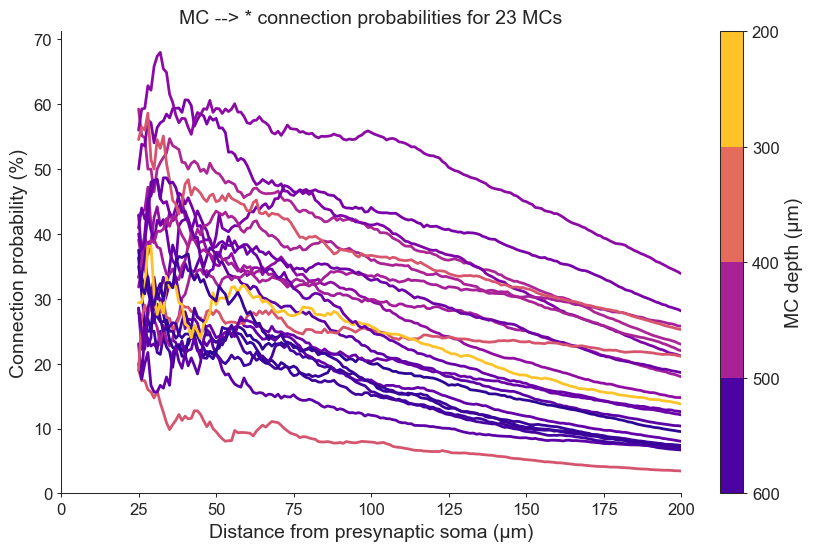

In [179]:
radii = np.arange(25, 201)
fig, ax = plt.subplots(figsize=(10, 6))
neural_root_ids = cell_type_table.pt_root_id.values[cell_type_table.cell_type.isin(V1DDEMClient.NEURAL_CELL_TYPES)]
# neural_root_ids = cell_type_table.pt_root_id.values[cell_type_table.cell_type == "PYC"]
cmap = plt.get_cmap("plasma_r")
# soma_pos = np.vstack(den_syn.post_soma_position_microns.values)
cmap_ticks = np.linspace(200, 600, 5)
cmap_norm = mpl.colors.Normalize(vmin=cmap_ticks.min(), vmax=cmap_ticks.max())
plots = []

pt_root_ids = axo_syn.pre_pt_root_id.unique()

for root_id in tqdm(pt_root_ids):
    syn = axo_syn[axo_syn.pre_pt_root_id == root_id]
    soma_pos_y = syn.pre_soma_position_microns.values[0][1]

    # Get all cells around the current one
    nearby_cells = em_client.get_nearby_cells(center_position_voxels=syn.pre_soma_position_voxels.values[0], radius_microns=radii.max())
    
    y = []

    for r in radii:
        root_ids_in_radius = nearby_cells.pt_root_id.values[nearby_cells.dist_to_center <= r]
        y.append(np.mean(np.isin(root_ids_in_radius, syn.post_pt_root_id)) * 100)
        
        # neural_root_ids_in_radius = root_ids_in_radius[np.isin(root_ids_in_radius, neural_root_ids)]
        # y.append(np.mean(np.isin(neural_root_ids_in_radius, syn.post_pt_root_id)) * 100)
        # y_neural_count.append(len(neural_root_ids_in_radius))


    
    # ax.plot(radii, y_frac, marker=".", color="blue")
    ax.plot(radii, y, linewidth=2, color=cmap(cmap_norm(soma_pos_y)))
    # ax.plot(radii, y_neural_count, marker=".")
    # break

sm = plt.cm.ScalarMappable(cmap=cmap, norm=cmap_norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, ticks=cmap_ticks, boundaries=cmap_ticks)
cbar.ax.invert_yaxis()
cbar.set_label("MC depth (µm)")

ax.set_title(f"MC --> * connection probabilities for {len(pt_root_ids)} MCs")
ax.set_xlabel("Distance from presynaptic soma (µm)")
ax.set_ylabel("Connection probability (%)")
ax.set_xlim(0, radii.max())
ax.set_ylim(0, ax.get_ylim()[1])

# Do the same with coregistered PYCs

In [180]:
corresponded = em_client.get_2p_corresponded_table()
pt_root_ids = corresponded.pt_root_id.values[corresponded.axon_proofreading_complete & corresponded.dendrite_proofreading_complete]
print(f"{len(pt_root_ids)} PYCs")

# Get the axonal synapses of these cells
axo_syn = em_client.get_axonal_synapses(pt_root_ids)
print(len(axo_syn), "axonal synapses")

20 PYCs
13540 axonal synapses


  0%|          | 0/20 [00:00<?, ?it/s]

/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encounte

(0.0, 105.0)

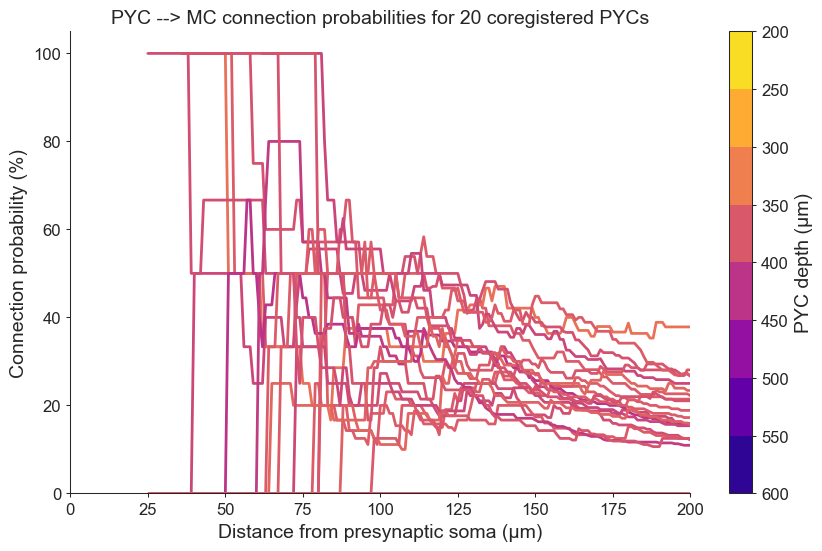

In [184]:
radii = np.arange(25, 201)
fig, ax = plt.subplots(figsize=(10, 6))
neural_root_ids = cell_type_table.pt_root_id.values[cell_type_table.cell_type.isin(V1DDEMClient.NEURAL_CELL_TYPES)]
neural_root_ids = cell_type_table.pt_root_id.values[cell_type_table.cell_type == "MC"]
cmap = plt.get_cmap("plasma_r")
# soma_pos = np.vstack(den_syn.post_soma_position_microns.values)
cmap_ticks = np.linspace(200, 600, 9)
cmap_norm = mpl.colors.Normalize(vmin=cmap_ticks.min(), vmax=cmap_ticks.max())
pt_root_ids = axo_syn.pre_pt_root_id.unique()

for root_id in tqdm(pt_root_ids):
    syn = axo_syn[axo_syn.pre_pt_root_id == root_id]
    soma_pos_y = syn.pre_soma_position_microns.values[0][1]

    # Get all cells around the current one
    nearby_cells = em_client.get_nearby_cells(center_position_voxels=syn.pre_soma_position_voxels.values[0], radius_microns=radii.max())
    
    y = []

    for r in radii:
        root_ids_in_radius = nearby_cells.pt_root_id.values[nearby_cells.dist_to_center <= r]
        # y.append(np.mean(np.isin(root_ids_in_radius, syn.post_pt_root_id)) * 100)
        
        neural_root_ids_in_radius = root_ids_in_radius[np.isin(root_ids_in_radius, neural_root_ids)]
        y.append(np.mean(np.isin(neural_root_ids_in_radius, syn.post_pt_root_id)) * 100)
        
        # y_neural_count.append(len(neural_root_ids_in_radius))


    
    # ax.plot(radii, y_frac, marker=".", color="blue")
    ax.plot(radii, y, linewidth=2, color=cmap(cmap_norm(soma_pos_y)))
    # ax.plot(radii, y_neural_count, marker=".")
    # break

sm = plt.cm.ScalarMappable(cmap=cmap, norm=cmap_norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, ticks=cmap_ticks, boundaries=cmap_ticks)
cbar.ax.invert_yaxis()
cbar.set_label("PYC depth (µm)")

ax.set_title(f"PYC --> MC connection probabilities for {len(pt_root_ids)} coregistered PYCs")
ax.set_xlabel("Distance from presynaptic soma (µm)")
ax.set_ylabel("Connection probability (%)")
ax.set_xlim(0, radii.max())
ax.set_ylim(0, ax.get_ylim()[1])

# Old stuff

In [9]:
# Choose a random cell
# pt_root_id = 864691132773514104 # PYC
# pt_root_id = 864691132547736642 # BC
pt_root_id = 864691132735860016 # from 2p corresponded

In [6]:
nearby_cells = client.get_nearby_cells(pt_root_id=pt_root_id, radius_microns=400, box_type="cylinder", drop_duplicates=True)
nearby_cells

,index,id,valid,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,pt_position_microns,dist_to_center
0,0,203262,t,338.276613,87197526360541948,864691132654552792,"[624680, 531094, 283770]","[619869, 525818, 30089]","[629414, 535750, 31050]","[-282.70505678483283, 310.7332642296362, -280....",232.615348
1,1,350562,t,326.965400,94866276031228266,864691132773514104,"[894573, 478559, 163530]","[891003, 473981, 17111]","[898608, 483370, 18134]","[-13.227572489957907, 226.5862979342913, -382....",84.415352
2,5,367611,t,238.028400,97474730063566602,864691132708957995,"[986529, 653935, 215865]","[981640, 650210, 22844]","[991030, 658126, 23687]","[79.63812467605004, 409.11152379461055, -378.6...",174.811679
3,6,234111,t,94.817519,88192653170600488,864691132355434969,"[659134, 891081, 318060]","[655875, 886658, 34018]","[662394, 895970, 34537]","[-246.47929816129653, 666.5858924027493, -343....",169.631781
4,8,425609,t,72.586114,101413249366824301,864691132866352353,"[1125976, 577266, 201285]","[1122406, 574473, 21374]","[1129002, 580526, 21985]","[218.69626583947112, 330.64446237573355, -372....",313.123829
...,...,...,...,...,...,...,...,...,...,...,...
47307,78549,423875,t,440.118184,102539286444224315,864691132752411826,"[1166018, 581845, 109620]","[1160818, 575870, 11204]","[1171217, 587587, 12382]","[258.6375910114044, 310.3196817984094, -461.67...",353.721446
47308,78555,237895,t,248.600654,87278272349661702,864691132782578316,"[625922, 905825, 489420]","[620645, 900781, 52356]","[630655, 909782, 53117]","[-279.3918448354466, 726.827384852095, -182.46...",297.346115
47309,78559,267622,t,349.824934,93527689948393260,864691133046970980,"[847392, 420980, 388980]","[842969, 416324, 41419]","[851893, 425558, 42360]","[-60.38373421917786, 231.693621360284, -149.45...",265.519676
47310,78560,382516,t,173.763515,96074570859091110,864691132678369054,"[937718, 914826, 255285]","[933140, 911334, 27121]","[941443, 919172, 27887]","[32.13148650490714, 671.2734608592035, -410.46...",123.894013


In [7]:
nearby_cells_typed = nearby_cells[nearby_cells.pt_root_id.isin(cell_type_table.pt_root_id)]
nearby_cells_typed

,index,id,valid,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,pt_position_microns,dist_to_center
1,1,350562,t,326.965400,94866276031228266,864691132773514104,"[894573, 478559, 163530]","[891003, 473981, 17111]","[898608, 483370, 18134]","[-13.227572489957907, 226.5862979342913, -382....",84.415352
19,35,383955,t,504.192300,95649060060623076,864691132569667100,"[920802, 795478, 329220]","[914826, 790822, 34920]","[926389, 800366, 36123]","[14.741818935006158, 576.1578669978572, -307.2...",150.127029
24,42,385028,t,415.785065,95863052645657911,864691132985016672,"[929338, 898530, 386595]","[924914, 892245, 41162]","[933994, 903885, 42103]","[23.848399659480666, 690.7637364002102, -279.5...",176.605819
34,59,293764,t,231.369357,94450111081742956,864691132625300120,"[878665, 697702, 245475]","[874009, 694365, 26030]","[883554, 701349, 26859]","[-27.97517873296875, 459.74380331495826, -361....",81.846740
41,73,351373,t,277.321739,96276193669654108,864691132689074198,"[944314, 572378, 210330]","[939814, 568187, 22179]","[948505, 576413, 23110]","[37.02512562261708, 329.260361441734, -362.108...",138.493455
...,...,...,...,...,...,...,...,...,...,...,...
47207,78391,351167,t,370.358383,95782993918161839,864691132735829608,"[927863, 548865, 192105]","[922897, 543743, 20268]","[932674, 554374, 21161]","[20.43727719882375, 301.809069425075, -373.374...",119.002603
47226,78429,277788,t,331.094581,93742231818908043,864691132653866455,"[853833, 547235, 263385]","[849410, 542734, 27946]","[858722, 551658, 28843]","[-53.50464564856806, 319.6876240868544, -304.2...",115.371918
47234,78441,383757,t,438.738900,96145008457434329,864691132617158087,"[938960, 917232, 319095]","[934071, 913197, 33814]","[944625, 921733, 34925]","[33.47003432698513, 690.6663951142274, -349.62...",140.380605
47276,78504,276199,t,332.548926,94022607015925148,864691132653436140,"[863998, 507659, 184770]","[859110, 503081, 19419]","[869198, 512315, 20370]","[-43.634328905701636, 260.4617774012664, -369....",64.988135


In [8]:
axonal_synapses = client.get_axonal_synapses(pt_root_id)
axonal_synapses

,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,position_microns
0,283698190,t,88186811142287594,864691132735860016,88186811142281968,864691130477972305,1433,"[67822, 70118, 175]","[67834, 70148, 170]","[67833, 70129, 167]","[-249.16484028166744, 380.3245346032827, -586...."
1,385450533,t,91770945110722995,864691132735860016,91770945110729813,864691132806481666,567,"[80983, 52833, 7540]","[81012, 52816, 7548]","[80991, 52827, 7544]","[-121.86723039771954, 306.8627300269267, -221...."
2,368783479,t,91212804715414834,864691132735860016,91212804715434010,864691131779063666,1972,"[79032, 70732, 1435]","[79021, 70703, 1439]","[79036, 70720, 1443]","[-140.32507311522576, 400.6993694077507, -532...."
3,377424590,t,91982669818257183,864691132735860016,91982669818260618,864691132826744496,191,"[81794, 54957, 7281]","[81823, 54952, 7287]","[81814, 54956, 7284]","[-113.91734672780102, 323.5543780978218, -238...."
4,420287146,t,93891215577559607,864691132735860016,93891215577558573,864691130701432437,2033,"[88675, 87049, 5525]","[88653, 87052, 5526]","[88651, 87060, 5527]","[-45.7848078084751, 601.9979913588901, -398.02..."
...,...,...,...,...,...,...,...,...,...,...,...
726,321553407,t,89943419144912037,864691132735860016,89943419144903079,864691132114896045,395,"[74391, 60539, 5842]","[74365, 60543, 5831]","[74393, 60537, 5837]","[-185.55215931466898, 358.7466608340851, -315...."
727,349544038,t,90928581362284776,864691132735860016,90928581362280063,864691132642223998,1777,"[77827, 60537, 4493]","[77859, 60537, 4490]","[77827, 60545, 4491]","[-152.3043520278727, 342.312277931388, -373.92..."
728,423249373,t,93886817061324170,864691132735860016,93886748341821167,864691131744385254,950,"[88666, 70538, 1958]","[88650, 70502, 1962]","[88648, 70513, 1957]","[-46.85409656406881, 404.7210621284844, -509.8..."
729,338118537,t,90086492961128427,864691132735860016,90086492961132279,864691132864276583,1060,"[74864, 69135, 4705]","[74881, 69168, 4707]","[74871, 69161, 4707]","[-180.63239554651048, 425.3650085816429, -387...."


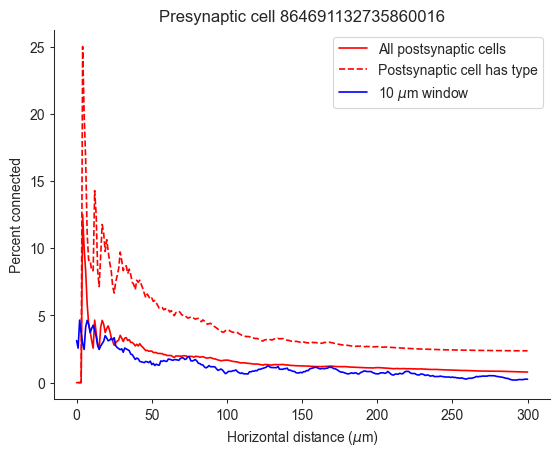

In [9]:
dist = np.arange(0, 301, 1)
frac_connected = [nearby_cells[(nearby_cells.dist_to_center <= d)].pt_root_id.isin(axonal_synapses.post_pt_root_id).mean()*100 for d in dist]
frac_connected_typed = [nearby_cells_typed[(nearby_cells_typed.dist_to_center <= d)].pt_root_id.isin(axonal_synapses.post_pt_root_id).mean()*100 for d in dist]
window_size = 10
frac_connected_windowed = [nearby_cells[abs(nearby_cells.dist_to_center - d) <= window_size].pt_root_id.isin(axonal_synapses.post_pt_root_id).mean()*100 for d in dist]

plt.plot(dist, frac_connected, color="red", label="All postsynaptic cells")
plt.plot(dist, frac_connected_typed, color="red", linestyle="dashed", label="Postsynaptic cell has type")
plt.plot(dist, frac_connected_windowed, color="blue", label=f"{window_size} $\mu$m window")
plt.xlabel("Horizontal distance ($\mu$m)")
plt.ylabel("Percent connected")
plt.title(f"Presynaptic cell {pt_root_id}")
plt.legend()

In [10]:
client.get_2p_corresponded_table()

,index,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,0,91,t,session13,plane2_0032,92618530666908453,864691132735860016,"[90593, 69633, 3833]"
1,1,90,t,session13,plane2_014,92055099945608124,864691132710145793,"[88274, 67650, 5900]"
2,2,55,t,session13,plane0_roi_0060,93180175218572599,864691132760377194,"[92791, 64340, 5745]"
3,3,43,t,session13,plane1_roi_0030,91843650048621008,864691132720617684,"[87483, 66110, 5411]"
4,4,98,t,session13,plane0_0067,94939531261931905,864691132801571037,"[99750, 64882, 5727]"
5,5,95,t,session13,plane4_0119,91070624654826905,864691132741334425,"[84428, 70297, 5418]"
6,6,97,t,session13,plane0_0040,91702362871442460,864691132652729971,"[86894, 63925, 5816]"
7,7,37,t,session13,plane2_roi_0269,93109944114777440,864691132807412738,"[92493, 64925, 7372]"
8,8,94,t,session13,plane1_0262,95573468367740795,864691132573738810,"[102044, 67460, 5245]"
9,9,39,t,session13,plane2_roi_0158,95150912506684625,864691132594653239,"[100608, 65812, 6828]"


## Plot locations of 2P corresponded cells

In [13]:
from experiment.v1dd_client import V1DDClient
from experiment.v1dd_ophys_session import V1DDOPhysSession
from stimulus_analysis.stimulus_analysis import StimulusAnalysis
from stimulus_analysis.drifting_gratings import DriftingGratings
from stimulus_analysis import fit_utils

ophys_client = V1DDClient("/Users/chase/Desktop/test_v1dd_data")
sess = ophys_client.load_ophys_session(mouse=409828, column=1, volume=3)

In [39]:
metrics = pd.read_csv("/Users/chase/Desktop/MindScope/Documents/v1dd-chase/dataframes/v1dd_metrics.csv", index_col=0, low_memory=False)

# Only consider valid metrics
print(f"{np.count_nonzero(metrics.is_valid)}/{len(metrics)} ({np.mean(metrics.is_valid)*100:.1f}%) ROIs are valid")
metrics = metrics[metrics.is_valid & (metrics.mouse == 409828) & (metrics.column == 1)]
metrics.insert(5, "roi_lookup", metrics.apply(lambda row: f"{row.column}-{row.volume}-{row.plane}-{row.roi}", axis=1))
metrics["ssi_fit"] = fit_utils.compute_dg_fit_ssi_from_metrics(metrics)

metrics.head()

9714/52826 (18.4%) ROIs are valid


,mouse,column,volume,plane,roi,roi_lookup,is_valid,depth,dgf_pref_response,dgf_pref_dir,...,dgw_resp_pref_dgf,dgf_resp_pref_dgw,ssi,ffsi,ssi_pref_both,ssi_orth,ffsi_all_dirs,spontaneous_event_mean,spontaneous_event_std,ssi_fit
M409828_11_1_89,409828,1,1,1,89,1-1-1-89,True,50,0.000943,330.0,...,0.000710,0.000586,0.265065,0.419054,0.033453,-0.139243,"[0.41905364, 0.61911654, 0.07141414, -0.801465...",0.000287,0.001903,0.173092
M409828_11_2_0,409828,1,1,2,0,1-1-2-0,True,66,0.000919,270.0,...,0.000394,0.000911,-0.084075,-0.183585,-0.088211,0.064530,"[-0.18358487, 0.04251838, -0.30215508, -0.1352...",0.000346,0.002629,-0.076999
M409828_11_2_1,409828,1,1,2,1,1-1-2-1,True,66,0.011217,0.0,...,0.002046,0.009295,-0.065169,-0.139425,-0.157938,0.044509,"[-4.483465, -0.13942526, -0.10395071, 1.0, -1....",0.000341,0.002262,-0.357757
M409828_11_2_2,409828,1,1,2,2,1-1-2-2,True,66,0.001237,120.0,...,0.000344,0.000369,0.536319,0.698187,-0.005231,-0.203358,"[-0.3096417, 0.6981869, 0.36546794, 0.25718334...",0.000341,0.002412,0.238414
M409828_11_2_4,409828,1,1,2,4,1-1-2-4,True,66,0.001093,240.0,...,0.000221,0.000660,-0.034136,-0.070685,-0.278688,-0.394162,"[-1.098053, -0.15058127, -0.28383604, -2.51381...",0.000234,0.001601,-0.131294


In [40]:
metrics["roi_loc_x"] = np.nan
metrics["roi_loc_y"] = np.nan

mouse, col, vol = sess.get_mouse_column_volume()
for plane in sess.get_planes():
    for roi in sess.get_rois(plane):
        if not sess.is_roi_valid(plane, roi):
            continue
    
        idx = f"M{mouse}_{col}{vol}_{plane}_{roi}"
        mask = sess.get_roi_image_mask(plane, roi)
        w = np.where(mask)
        metrics.at[idx, "roi_loc_x"] = np.median(w[1])
        metrics.at[idx, "roi_loc_y"] = np.median(w[0])

metrics["dgw_tuning_pref_dir"] = fit_utils.get_dg_pref_dir(metrics, "dgw")

In [41]:
corresponded = client.get_2p_corresponded_table()
corresponded.head()

,index,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position,roi_lookup
0,0,91,t,session13,plane2_0032,92618530666908453,864691132735860016,"[90593, 69633, 3833]",1-3-3-32
1,1,90,t,session13,plane2_014,92055099945608124,864691132710145793,"[88274, 67650, 5900]",1-3-3-14
2,2,55,t,session13,plane0_roi_0060,93180175218572599,864691132760377194,"[92791, 64340, 5745]",1-3-1-60
3,3,43,t,session13,plane1_roi_0030,91843650048621008,864691132720617684,"[87483, 66110, 5411]",1-3-2-30
4,4,98,t,session13,plane0_0067,94939531261931905,864691132801571037,"[99750, 64882, 5727]",1-3-1-67


## Plot the EM location vs the 2P location

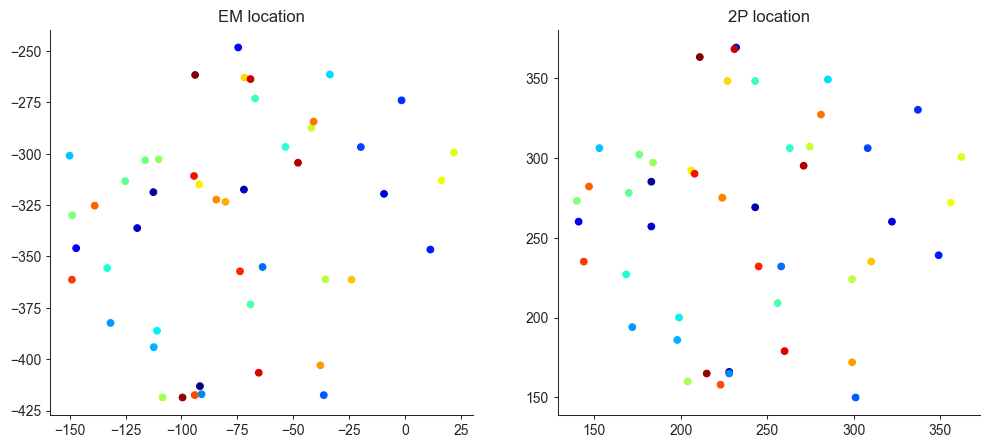

In [71]:
fig, axs = plt.subplots(figsize=(12, 5), ncols=2)

em_locs = [[], [], [], []]
op_locs = [[], [], [], []]

for idx, row in corresponded.iterrows():
    em_pos = row["pt_position"]
    em_pos = client.transform_position_to_microns(em_pos, df=corresponded)
    roi_lookup = row["roi_lookup"]

    for i in range(len(em_pos)):
        em_locs[i].append(em_pos[i])

    em_locs[3].append(idx)
    
    metrics_row = metrics[metrics.roi_lookup == roi_lookup]
    
    if len(metrics_row) > 0:
        metrics_row = metrics_row.iloc[0]
        op_locs[0].append(metrics_row["roi_loc_x"])
        op_locs[1].append(metrics_row["depth"])
        op_locs[2].append(metrics_row["roi_loc_y"])
        op_locs[3].append(idx)

axs[0].set_title("EM location")
axs[1].set_title("2P location")

axs[0].scatter(em_locs[0], em_locs[2], c=em_locs[3], cmap="jet")
axs[1].scatter(op_locs[0], op_locs[2], c=op_locs[3], cmap="jet")

# axs[0].scatter(em_locs[0], em_locs[1], c=em_locs[3], cmap="jet") # X-Y location
# axs[1].scatter(op_locs[0], op_locs[1], c=op_locs[3], cmap="jet")

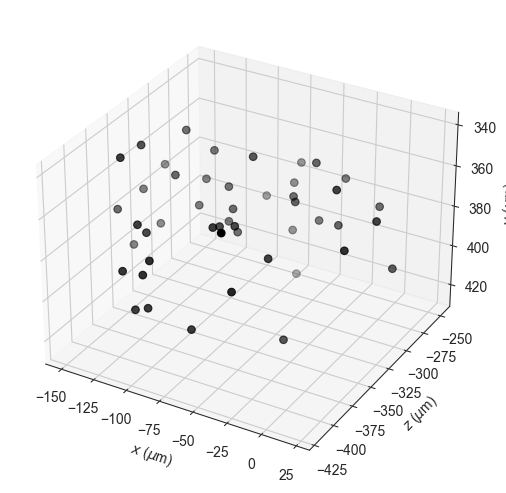

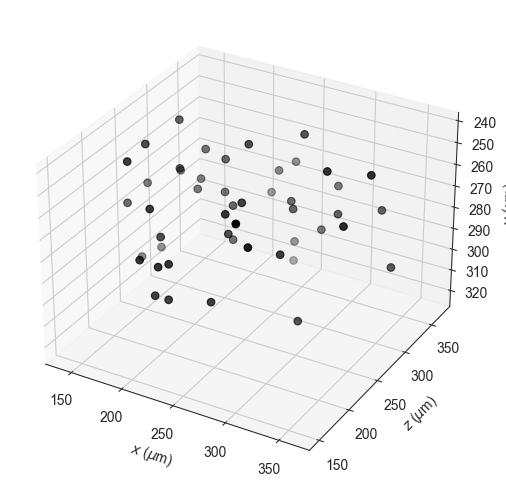

In [68]:
# EM
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")

ax.scatter3D(em_locs[0], em_locs[2], em_locs[1], c="black", s=30)
ax.set_xlabel("$x$ ($\mu$m)")
ax.set_ylabel("$z$ ($\mu$m)")
ax.set_zlabel("$y$ ($\mu$m)")
ax.invert_zaxis()
# ax.view_init(0, 90)
fig.tight_layout()

# 2P
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")

ax.scatter3D(op_locs[0], op_locs[2], op_locs[1], c="black", s=30)
ax.set_xlabel("$x$ ($\mu$m)")
ax.set_ylabel("$z$ ($\mu$m)")
ax.set_zlabel("$y$ ($\mu$m)")
ax.invert_zaxis()
# ax.view_init(0, 90)
fig.tight_layout()

In [81]:
min(em_locs[1])

340.12407978318817

In [80]:
len(em_locs[1])

48

In [44]:
metrics_corresponded = metrics[metrics.roi_lookup.isin(corresponded.roi_lookup)]
len(metrics_corresponded)

48

Text(0, 0.5, 'ROI count')

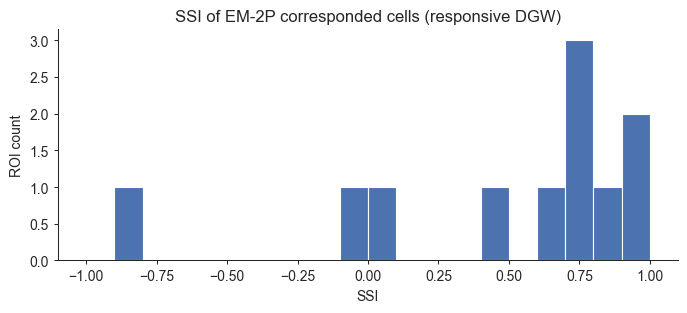

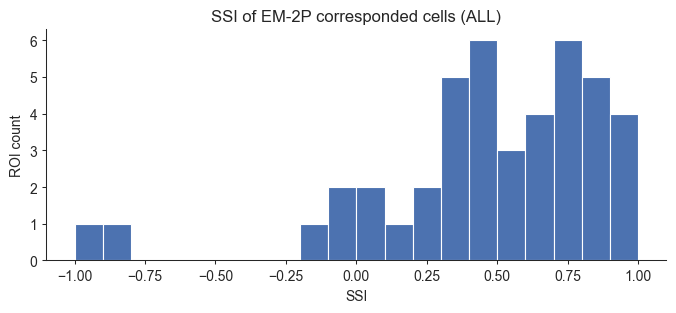

In [47]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(metrics_corresponded.ssi_fit[metrics_corresponded.dgw_frac_responsive_trials >= 0.5], bins=np.arange(-1, 1.1, 0.1))
ax.set_title("SSI of EM-2P corresponded cells (responsive DGW)")
ax.set_xlabel("SSI")
ax.set_ylabel("ROI count")

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(metrics_corresponded.ssi_fit, bins=np.arange(-1, 1.1, 0.1))
ax.set_title("SSI of EM-2P corresponded cells (ALL)")
ax.set_xlabel("SSI")
ax.set_ylabel("ROI count")

## Find the number of 2P corresponded cells that are connected to other 2P corresponded cells